Plot of allometrically-scaled mass-specific metabolic rate
---

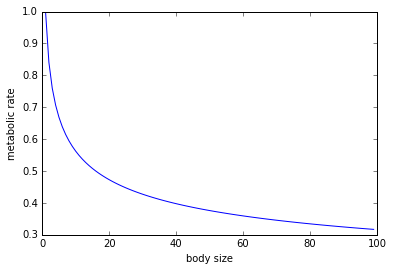

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# This plot shows how mass-specific metabolic rate falls off with body size
x = np.arange(1, 100)
plt.plot(x, x**-.25)
plt.xlabel("body size")
plt.ylabel("metabolic rate")

Replicating allometrically-scaled calculated parameters
---

First attempt: metabolic rate x_i of Fish4 (Adult piscivorous fish) from (Boit et al. 2012), using constants and formulas from Brose et al. 2006. Resulting x_i does not match.

In [9]:
# Trying to replicate the calculations for metabolic rate x_i of Fish4 (Adult piscivorous fish)
# from (Boit et al. 2012).
# Formulas are from Brose et al. 2006

# Constants
a_r = 1      # Allometric constant for primary producer growth rate (Brose et al. 2006)
a_x = 0.88   # Allometric constant for ectotherm vertebrate metabolism (Brose et al. 2006)
M_P = 6.40e-5 # Body mass of Alg1 (Single cell algae) (Boit et al. 2012)
M_C = 7.04e+7 # Body mass of Fish4 (Adult piscivorous fish) (Boit et al. 2012)

R_P = a_r * M_P ** -.25  # Producer mass-specific growth rate, pre-time-normalization
X_C = a_x * M_C ** -.25  # Consumer mass-specific metabolic rate, pre-time-normalization

# Normalize by the time scale
r_i = 1         # Mass-specific growth rate of basal population is set to 1  (QUESTION: Why is r_i defined and not used?)
x_i = X_C / R_P # Mass-specific metabolic rate

print("R_P = {}, X_C = {}, x_i = {}".format(R_P, X_C, x_i))

R_P = 11.180339887498949, X_C = 0.009607037974265186, x_i = 0.0008592795989151533


## Second attempt
Based on information on Biot 2012 supplementary info, Allometric Parameterization section.

$r_i$ for for producers are all slightly off.

$x_i$ for Fish1 and Fish2 match. Results for Fish3 and Fish4 are slightly off.

In [49]:
M_k = 6.40e-5       # Body mass of reference producer Alg1
a_Ti = 0.88         # Allometric constant for all fish species
a_rk = a_ri = 1     # Allometric constant for all producers
A_nonfish = 0.15    # Allometric scaling exponent for nonfish species
A_fish = 0.11       # Allometric scaling exponent for fish species

# M_i is body mass in micrograms carbon per individual
for producerName, M_i in (('Alg1', 6.4e-5), ('Alg2', 2.56e-4), ('Alg3', 3.2e-5), ('Alg4', 1.28e-4), ('Alg5', 8e-6),
                          ('APP', 2.5e-7)):
    r_i = (a_ri / a_rk) * ((M_k / M_i) ** A_nonfish)
    print("{} r_i = {}".format(producerName, r_i))

for fishName, M_i in (('Fish1', 1.1e+6), ('Fish2', 4.4e+6), ('Fish3', 3.52e+7), ('Fish4', 7.04e+7)):
    x_i = (a_Ti / a_rk) * ((M_k / M_i) ** A_fish)
    print("{} x_i = {}".format(fishName, x_i))

Alg1 r_i = 1.0
Alg2 r_i = 0.8122523963562356
Alg3 r_i = 1.109569472067845
Alg4 r_i = 0.9012504626108302
Alg5 r_i = 1.3660402567543954
APP r_i = 2.2973967099940698
Fish1 x_i = 0.06585811163402651
Fish2 x_i = 0.05654349835803428
Fish3 x_i = 0.04498944991190891
Fish4 x_i = 0.04168016953359994


# Endotherm metabolic rates

From Williams et al. 2007

In [30]:
# "Mass-to-respiration conversion constant specific to animal species i's metabolic type"
# - definition from Cotter 2015
# - value for endotherms from Williams et al. 2007, originally from Yodzis and Innes
# - units: kg^.25 / year
a_Ti = 54.9

# f_ri is a "fractional constant used in metabolic and growth rate functions" (Cotter)
# k refers to the primary producer
# Where is its value?
# "value may be specified for each specific population or feeding interaction in a particular ecological context"
#  - (Williams)
# "f_r...would typically be on the order of 0.1 for a field population." (Y&I)
#f_rk = 0.1
f_rk = 1

# a_ri is a "mass-to-growth conversion constant specific to plant species i" (Cotter)
# k refers to the primary producer
# Trying the value for phytoplankton from the Williams/Y&I table
# - units: kg^.25 / year
#a_rk = 0.4
a_rk = 1

# Body mass of reference producer.
# Trying to replicate parameter values in WoB DB, so I'll use "Grass and Herbs" as the reference producer.
# Its "body mass" is 40 (units? Since it's divided by M_i, which has the same units, units cancel)
M_k = 40
#M_k = 1

# Body mass of Aardvark from WoB database
M_i = 66

# African Clawless Otter
#M_i = 13

#  x_i = (a_Ti / a_rk) * ((M_k / M_i) ** A_fish)
x_i = (a_Ti / (f_rk * a_rk)) * ((M_k / M_i) ** .25)

# This should be 0.0821097 (Aardvark)
print(x_i)
# Not even close

# Do some algebra
x_i = 0.0821097 # Aardvark
#x_i = 0.123252 # Otter
coef = x_i / ((M_k / M_i) ** .25)
print(coef)

48.43969036536332
0.09306051496198883


In [47]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv('wob-database/species-table.csv')

df['metabolismUnscaled'] = 1 / df['biomass'] ** 0.25
df['ratio'] = df.metabolism / df.metabolismUnscaled

pd.pivot_table(df, index='category', values=['ratio'], aggfunc=[np.mean, np.std, np.median])
df.sort_values(by='category')

,species_id,name,organism_type,cost,description,category,biomass,diet_type,carrying_capacity,metabolism,trophic_level,growth_rate,model_id,unlock,node_id,metabolismUnscaled,ratio
57,58,Domestic Cat,0,10,Animal,Animal,10.000000,1,0,0.500000,1.00000,0,0,0,58,0.562341,0.889140
53,54,Domestic Chicken,0,25,Bird,Bird,10.000000,0,0,0.500000,1.00000,0,0,0,54,0.562341,0.889140
25,26,Yellow-Breasted Apalis,0,20,The Yellow-breasted Apalis is a species of bir...,Bird,0.011000,0,0,0.722657,2.65786,0,67,0,26,3.087819,0.234035
26,27,Yellow-Bellied Eremomela,0,10,The Yellow-bellied Eremomela is a common breed...,Bird,0.009000,0,0,0.759836,2.78074,0,68,2,27,3.246679,0.234035
27,28,Red-Faced Crombec,0,15,The Red-faced Crombec is a species of African ...,Bird,0.010000,2,0,0.740083,2.00000,0,69,0,28,3.162278,0.234035
28,29,Three-Banded Plover,0,20,The Three-banded Plover or Three-banded Sandpl...,Bird,0.035000,1,0,0.541082,3.25434,0,70,0,29,2.311974,0.234035
29,30,Dwarf Epauletted Bat,0,10,The Dwarf Epauletted Bat is a species of megab...,Bird,0.029000,2,0,0.567128,2.00000,0,71,0,30,2.423263,0.234035
32,33,Cape Teal,0,20,The Cape Teal is a 44-46 cm long dabbling duck...,Bird,0.400000,0,0,0.294283,2.29861,0,72,2,33,1.257433,0.234035
39,40,Yellow-Throated Sandgrouse,0,20,The Yellow-throated Sandgrouse is a species of...,Bird,0.325000,2,0,0.309963,2.00000,0,76,0,40,1.324430,0.234035
41,42,African Grey Hornbill,0,20,The African Grey Hornbill is a hornbill. Hornb...,Bird,0.205000,0,0,0.347810,2.66657,0,77,3,42,1.486146,0.234035


In [5]:
text = "one\ntwo"
for line in text.split('\n'):
    print(line)

one
two
